<a href="https://colab.research.google.com/github/Pranav4860/ES114-PSDV/blob/main/Two_Discrete_RVs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
def joint_pmf_table(joint_pmf, x_values, y_values):
    print("    ", end="")
    for y in y_values:
        print(f"{y:>10}", end="")
    print()
    for i, row in enumerate(joint_pmf):
        print(f"{x_values[i]:<4}", end="")
        for prob in row:
            print(f"{prob:>10.4f}", end="")
        print()

In this the a function is defined to represent the joint pmf in an tabular form.

# (a)

In [ ]:
x=list(map(int,input('enter range for r.v. X:').split(',')))
y=list(map(int,input('enter range for r.v. Y:').split(',')))
jpmf=[]
for i in range(len(x)):
  st='Enter joint PMF for X='+str(x[i])+' for each Y in order:'
  j1=list(map(float, input(st).split(',')))
  jpmf.append(j1)
jpmf=np.array(jpmf)
pmfx=[]
for i in range(len(x)):
  s=0
  for j in range(len(y)):
    s+=jpmf[i,j]
  pmfx.append(s)
pmfy=[]
for i in range(len(y)):
  s=0
  for j in range(len(x)):
    s+= jpmf[j,i]
  pmfy.append(s)
joint_pmf_table(jpmf,x,y)

def check_independence(pmfx,pmfy,jpmf):
  m=0
  for i in range(len(pmfx)):
    x1=pmfx[i]
    for j in range(len(pmfy)):
      y1=pmfy[j]
      if jpmf[i,j]==x1*y1:
        m+=1
      else:
        return 'not idependent'
  if m==len(x)*len(y):
    return 'idependent'
print(check_independence(pmfx,pmfy,jpmf))

enter range for r.v. X:1,2
enter range for r.v. Y:3,4
Enter joint PMF for X=1 for each Y in order:0.1,0.2
Enter joint PMF for X=2 for each Y in order:0.3,0.4
             3         4
1       0.1000    0.2000
2       0.3000    0.4000
not idependent


In this code first I took input of ranges of r.v. X and Y and their joint pmf. Then, I calculated the marginal pmf for each values of X and Y r.v.'s by the sum of their respective rows and columns. Then, represent the jooint pmf using above defined function. Then, I defined a function to check the independence. I compared all the elements of the 2-D array of joint pmf with the product of their individual marginal pmf's. even if there is a mismatch it won't be independent.

# (b)

Plotting the marginal PMF's and CDF's

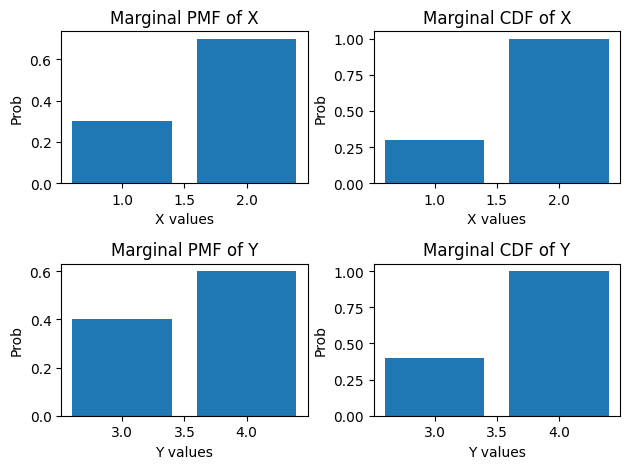

In [ ]:
# Plotting Marginal PMF and CDF
cdfx = np.cumsum(pmfx)
cdfy = np.cumsum(pmfy)
plt.figure()
plt.subplot(2,2,1)
plt.bar(x , pmfx)
plt.xlabel("X values")
plt.ylabel('Prob')
plt.title('Marginal PMF of X')

plt.subplot(2,2,2)
plt.bar(x , cdfx)
plt.xlabel("X values")
plt.ylabel('Prob')
plt.title('Marginal CDF of X')

plt.subplot(2,2,3)
plt.bar(y , pmfy)
plt.xlabel("Y values")
plt.ylabel('Prob')
plt.title('Marginal PMF of Y')

plt.subplot(2,2,4)
plt.bar(y , cdfy)
plt.xlabel("Y values")
plt.ylabel('Prob')
plt.title('Marginal CDF of Y')



plt.tight_layout()
plt.show()

Plotting Joint PMF and CDF

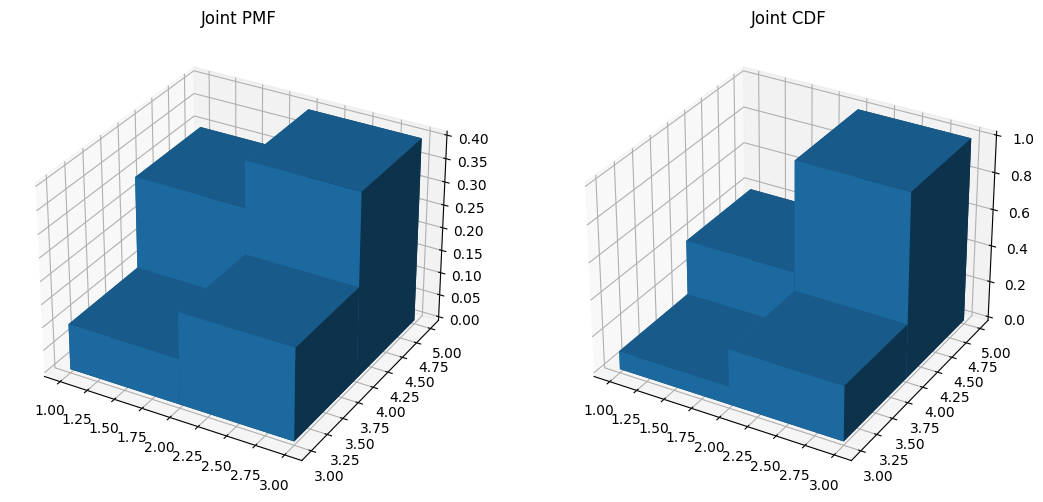

In [ ]:
jcdf=np.cumsum(np.cumsum(jpmf,axis=0),axis=1) #calculating joint cdf
fig = plt.figure(figsize=(13, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x1 , y1 =np.meshgrid(x,y)
fx , fy = x1.flatten() , y1.flatten()
z = np.zeros_like(jpmf).flatten()
height = jpmf.flatten()
depth = width = 1

ax1.bar3d(fx , fy , z ,depth, width, height,shade = True)
ax1.set_title("Joint PMF")

x1 , y1 =np.meshgrid(x,y)
fx , fy = x1.flatten() , y1.flatten()
z = np.zeros_like(jpmf).flatten()
height1 = jcdf.flatten()
depth = width = 1

ax2.bar3d(fx , fy , z ,depth, width, height1,shade = True)
ax2.set_title("Joint CDF");


# (c)

In [ ]:
ex=0
ey=0
exy=0
for i in range(len(x)):
  ex+=x[i]*pmfx[i]
for j in range(len(y)):
  ey+=y[i]*pmfy[i]
for k in range(len(x)):
  for l in range(len(y)):
    exy+=(jpmf[k,l]*x[k]*y[l])
ex1y1=abs(exy-(ex*ey))
ex1y1=round(ex1y1,2)
print('E[X1Y1]= ',ex1y1)

E[X1Y1]=  2.06


Logics used:
1. E[X]= some constant value.
2. E[KX]=K*E[X], where K is any constant.
3. E[K]= K,where K is any constant.

Given: X1 = X -E[X] and Y1 = Y-E[Y]


E[X1Y1] = E(((X-E[X])*(Y-E[Y])))

E[X1Y1] = E(XY - X * E[Y] - Y * E[X]+ E[X]*E[Y])

E[X1Y1] = E[XY] - E[X]E[Y] -E[Y]E[X] + E[X] * E[Y]

E[X1Y1] = E[XY] - E[X] * E[Y]